# Numerical method - notes

In [7]:
# UWAGA: czasem wykresy się dziwnie nadpisują, animacje zacinają itd - wtedy trzeba zrestartować kernel

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
sns.set_style("darkgrid")
mpl.rcParams['figure.dpi'] = 130

import matplotlib.pyplot as plt

%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def FVM(method, u_max=1, rho_max=1, a=-1.5, b=1.5, T=1, k=0.01, h=0.001):
    """
    Implementation of the finite volume method for the vehicular traffic model.
    
    Arguments:
    method - method of approximation of the numerical flux, "Lax-Friedrich" or "simple"
    u_max - maximum velocity
    rho_max - maximum density
    (a, b) - space range
    (0, T) - time range
    k - spatial step
    h - time step    
    """
    
#     xs = np.arange(a+k/2, b+k/2, k) # vector [x_1, x_2, ..., x_n] where a = x_{1/2}, b = x_{n + 1/2}
    xs = np.arange(a, b+k, k)       # vector [x_0, x_1, x_2, ..., x_n] where a = x_0, b = x_n
    ts = np.arange(0, T+h, h)
    
    rho = np.zeros((len(xs), len(ts)))
    
    # initial condition for t=0 (red light turns green)
    rho[:int(len(xs)/2),0] = rho_max # rho(x, 0) = rho_max for x<0, rho(x, 0) = 0 for x>0
    
#     boundary condition for x=a can be rho_max
    rho[0,:] = rho_max # rho(a, t) = rho_max
    
#     boundary condition for x=b can be 0
    rho[-1,:] = 0 # rho(b, t) = 0
     
    for n in range(len(ts)-1):      
        # approximation of the numerical flux
        if method == 'Lax-Friedrich': # Lax-Friedrich flux
            F_p = k/(2*h)*(rho[1:-1,n] - rho[2:,n]) + 1/2*(u_max*rho[1:-1,n]*(1 - rho[1:-1,n]/rho_max) + u_max*rho[2:,n]*(1 - rho[2:,n]/rho_max))
            F_m = k/(2*h)*(rho[0:-2,n] - rho[1:-1,n]) + 1/2*(u_max*rho[:-2,n]*(1 - rho[0:-2,n]/rho_max) + u_max*rho[1:-1,n]*(1 - rho[1:-1,n]/rho_max))
        elif method == 'simple': # simple approximation of the flux
            F_p = u_max*rho[1:-1,n]*(1 - rho[1:-1,n]/rho_max)
            F_m = u_max*rho[0:-2,n]*(1 - rho[0:-2,n]/rho_max)
        
        rho[1:-1,n+1] = rho[1:-1,n] - h/k*(F_p - F_m)
        
#         explicit formula:
#         rho[1:-1, n+1] = 1/2*(rho[2:,n] + rho[0:-2,n]) + h/(2*k)*(u_max*rho[0:-2,n]*(1 - rho[0:-2,n]/rho_max) - u_max*rho[2:,n]*(1 - rho[2:,n]/rho_max))
        
#         checking if there are any NaN values:
#         print("n = ", n, "number of NaN in rho: ", sum(np.isnan(rho[1:-1,n])))
#         print("n = ", n, "number of NaN in F_p: ", sum(np.isnan(F_p)))
#         print("n = ", n, "number of NaN in F_m: ", sum(np.isnan(F_m)))
         
    return rho, xs, ts

In [3]:
# FVM("Lax-Friedrich")
rho, xs, ts = FVM("Lax-Friedrich")

<IPython.core.display.Javascript object>


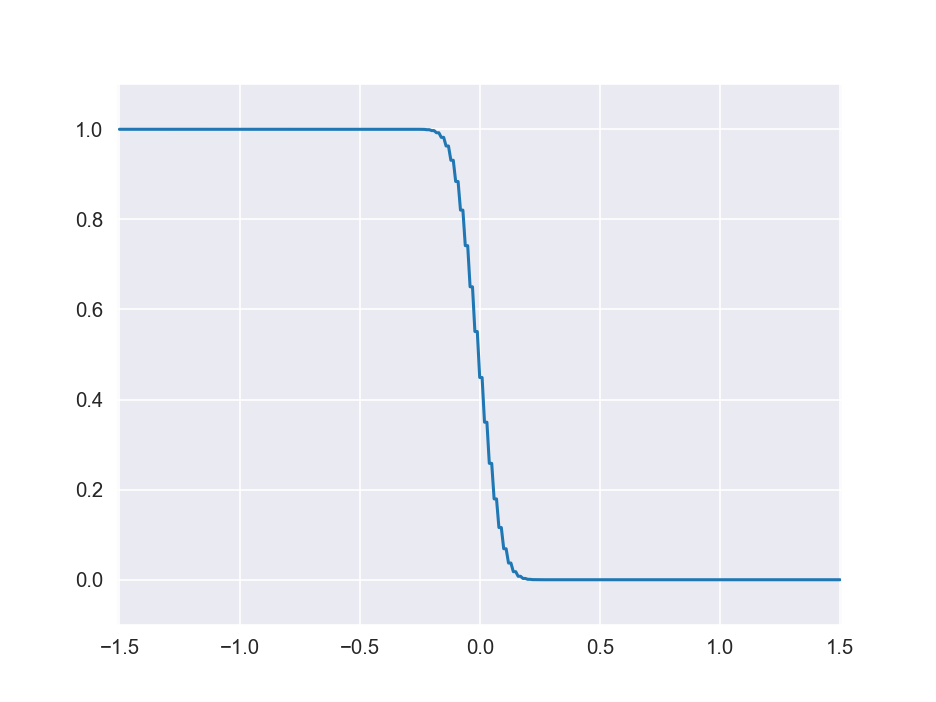

In [6]:
fig, ax = plt.subplots()
line, = ax.plot([])

ax.set_xlim(xs[0]-(xs[1] - xs[0]), xs[-1]+(xs[1] - xs[0]))
ax.set_ylim(0-0.1, 1+0.1)

def animate(frame_num):
    rhos = rho[:,frame_num]
    line.set_data((xs, rhos))
    return line

anim = FuncAnimation(fig, animate, frames=len(ts), interval=50)
plt.show()

<IPython.core.display.Javascript object>


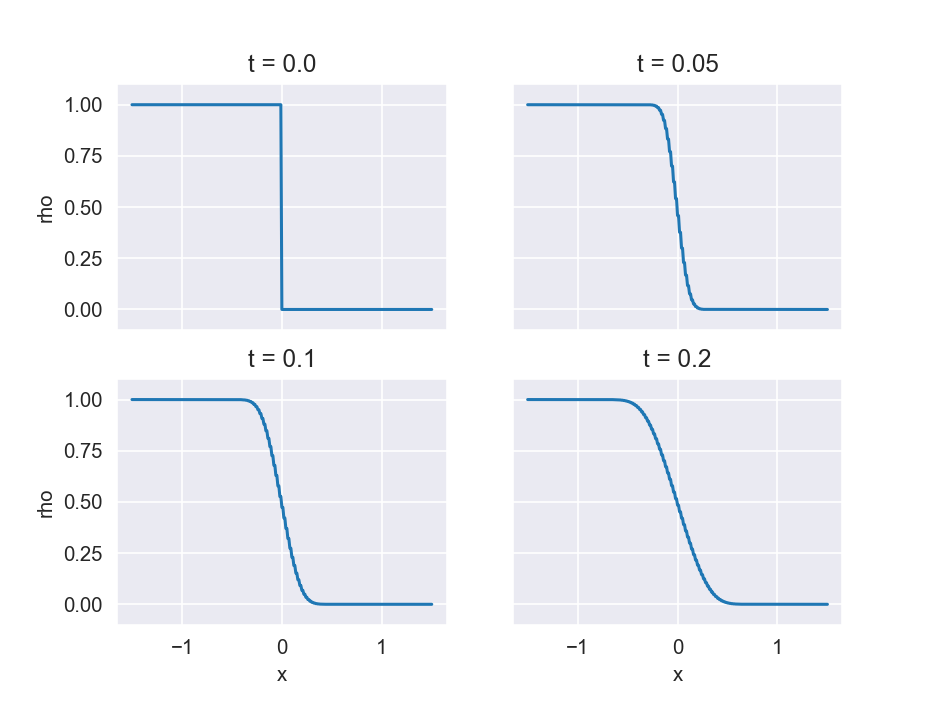

In [19]:
time_points = [0, 50, 100, 200]

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(xs, rho[:,time_points[0]])
axs[0, 0].set_title(f't = {ts[time_points[0]]}')
axs[0, 0].set_ylim(-0.1, 1.1)
axs[0, 1].plot(xs, rho[:,time_points[1]])
axs[0, 1].set_title(f't = {ts[time_points[1]]}')
axs[0, 1].set_ylim(-0.1, 1.1)
axs[1, 0].plot(xs, rho[:,time_points[2]])
axs[1, 0].set_title(f't = {ts[time_points[2]]}')
axs[1, 0].set_ylim(-0.1, 1.1)
axs[1, 1].plot(xs, rho[:,time_points[3]])
axs[1, 1].set_title(f't = {ts[time_points[3]]}')
axs[1, 1].set_ylim(-0.1, 1.1)

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='rho')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<IPython.core.display.Javascript object>


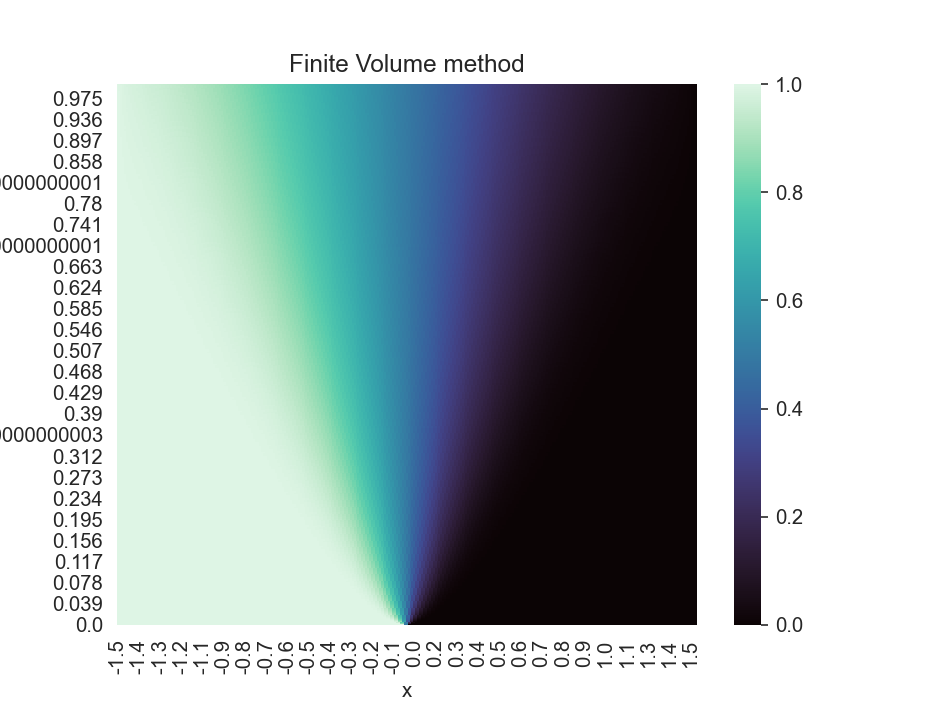

In [11]:
fig, ax = plt.subplots()
ax = sns.heatmap(pd.DataFrame(rho.T, columns = np.round(xs,1), index = ts), cmap='mako')
ax.invert_yaxis()
plt.title('Finite Volume method')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [4]:
def theoretical_solution(xs, ts, u_max=1, rho_max=1):
    """
    Theoretical solution to the "Red light turns green" problem.
    
    Arguments:
    xs - space points
    ts - time points
    u_max - maximum velocity
    rho_max - maximum density
    """
    
    rho_theoretical = np.zeros((len(xs), len(ts)))
    
    # initial condition for t = 0
    rho_theoretical[xs < 0,0] = rho_max  # rho(x, 0) = rho_max for x<0, rho(x, 0) = 0 for x>0
    
    for i, t in enumerate(ts[1:]):
        rho_theoretical[:,i+1] = rho_max/2*(1 - xs/(t*u_max)) # solution in the void
        rho_theoretical[xs < -u_max*t,i+1] = rho_max
        rho_theoretical[xs > u_max*t,i+1] = 0
    
    return rho_theoretical

In [25]:
# theoretical_solution(xs, ts)

In [5]:
rho_theoretical = theoretical_solution(xs, ts)

<IPython.core.display.Javascript object>


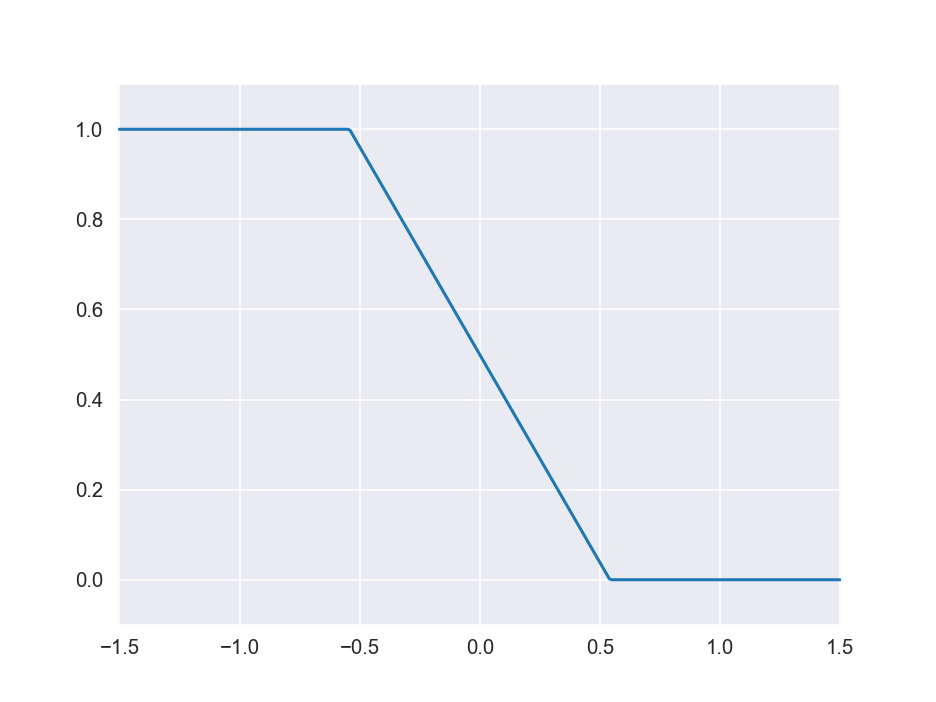

In [10]:
fig, ax = plt.subplots()
line, = ax.plot([])

ax.set_xlim(xs[0]-(xs[1] - xs[0]), xs[-1]+(xs[1] - xs[0]))
ax.set_ylim(0-0.1, 1+0.1)

def animate(frame_num):
    rhos_theoretical = rho_theoretical[:,frame_num]
    line.set_data((xs, rhos_theoretical))
    return line

anim = FuncAnimation(fig, animate, frames=len(ts), interval=50)
plt.show()

<IPython.core.display.Javascript object>


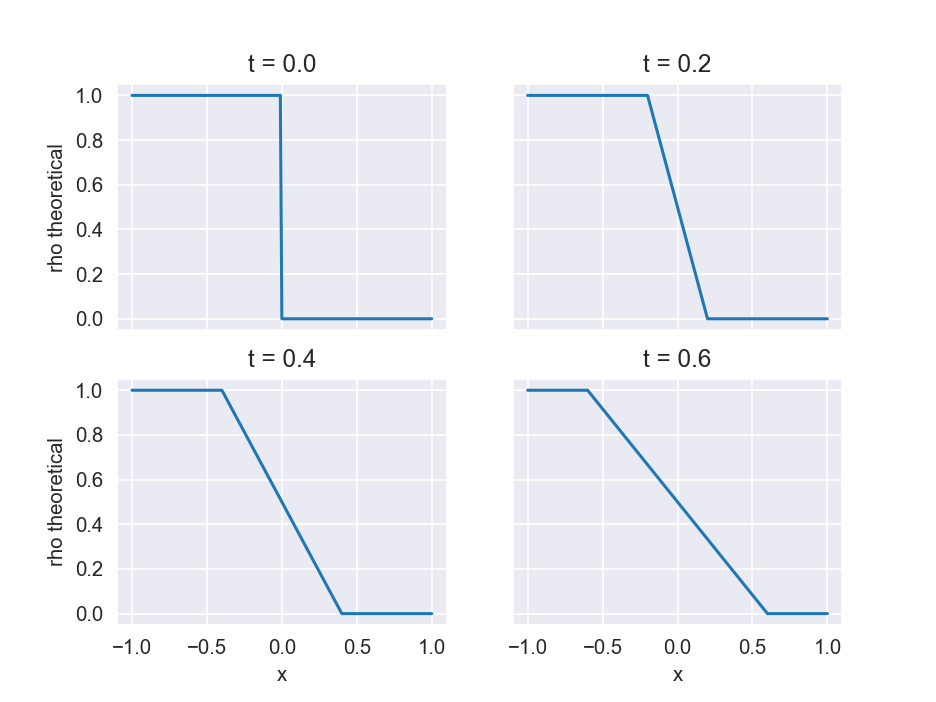

In [10]:
time_points = [0, 200, 400, 600]

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(xs, rho_theoretical[:,time_points[0]])
axs[0, 0].set_title(f't = {ts[time_points[0]]}')
axs[0, 1].plot(xs, rho_theoretical[:,time_points[1]])
axs[0, 1].set_title(f't = {ts[time_points[1]]}')
axs[1, 0].plot(xs, rho_theoretical[:,time_points[2]])
axs[1, 0].set_title(f't = {ts[time_points[2]]}')
axs[1, 1].plot(xs, rho_theoretical[:,time_points[3]])
axs[1, 1].set_title(f't = {ts[time_points[3]]}')

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='rho theoretical')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<IPython.core.display.Javascript object>


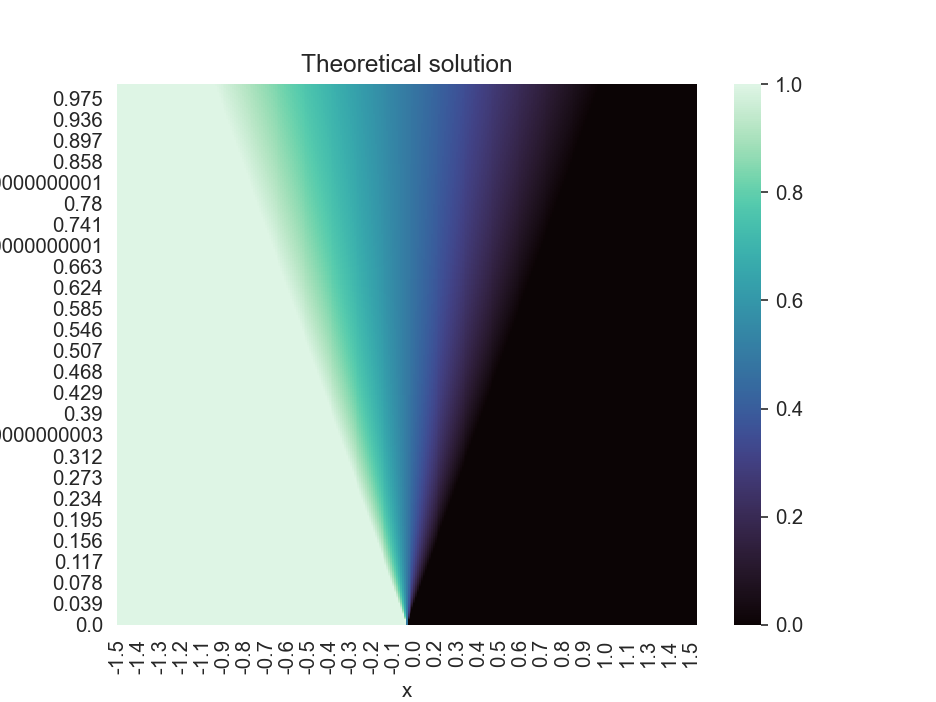

In [9]:
fig, ax = plt.subplots()
ax = sns.heatmap(pd.DataFrame(rho_theoretical.T, columns = np.round(xs,1), index = ts), cmap='mako')
ax.invert_yaxis()
plt.title('Theoretical solution')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

<IPython.core.display.Javascript object>


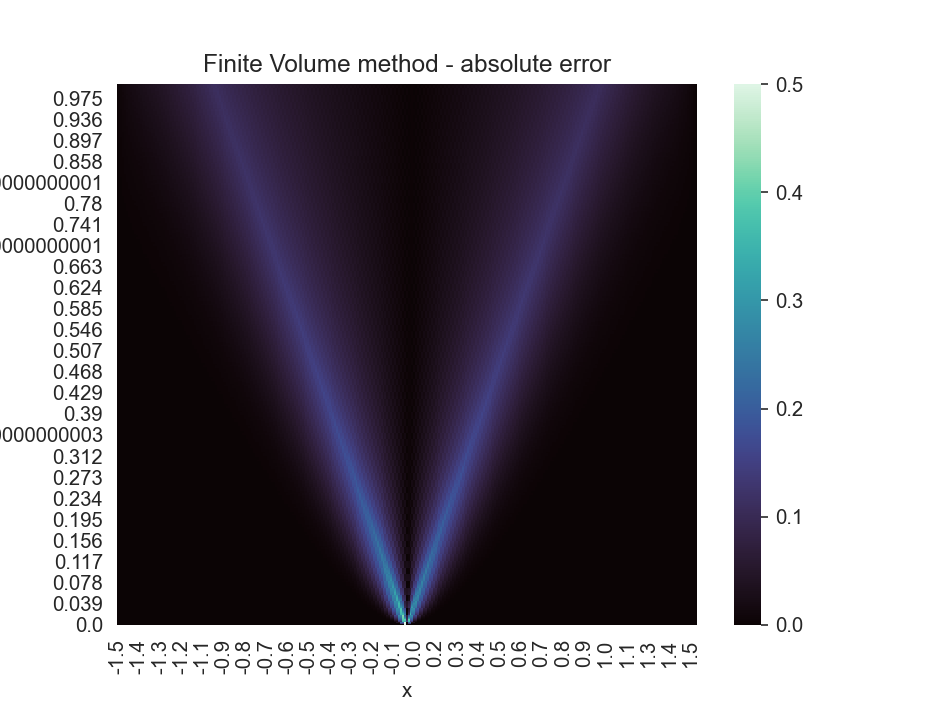

In [8]:
error = abs(rho - rho_theoretical)

fig, ax = plt.subplots()
ax = sns.heatmap(pd.DataFrame(error.T, columns = np.round(xs,1), index = ts), cmap='mako')
ax.invert_yaxis()
plt.title('Finite Volume method - absolute error')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

To do:
- convergence - rząd zbieżności (wykres maksymalnego błędu w zależności od kroku czasowego w skali log-log + wyznaczenie tego rzędu (regresja liniowa))
- consistency - opis
- stability - pokazać, że wybucha czasem (CFL condition)